## Build a random forest classifier to predict the risk of heart disease based on a dataset of patient information. The dataset contains 303 instances with 14 features, including age, sex, chest pain type, resting blood pressure, serum cholesterol, and maximum heart rate achieved.

## Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the numerical features if necessary.

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df =pd.read_csv('dataset.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
#there is no categorical variable

## Q2. Split the dataset into a training set (70%) and a test set (30%).

In [8]:
x = df.drop('target',axis=1)
y= df['target']

In [9]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [12]:
x_train.shape, x_test.shape

((212, 13), (91, 13))

In [13]:
x_train=scaler.fit_transform(x_train)

In [14]:
x_test= scaler.transform(x_test)

## Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each tree. Use the default values for other hyperparameters.

In [15]:
from sklearn.ensemble import RandomForestClassifier

rfs = RandomForestClassifier(max_depth=10,n_estimators=100)

In [16]:
rfs.fit(x_train,y_train)

RandomForestClassifier(max_depth=10)

In [17]:
y_pred=rfs.predict(x_test)

## Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.

In [18]:
from sklearn.metrics import accuracy_score,classification_report

In [19]:
acc_score = accuracy_score(y_pred,y_test)
report = classification_report(y_pred,y_test)

acc_score

0.7582417582417582

In [20]:
report

'              precision    recall  f1-score   support\n\n           0       0.73      0.73      0.73        41\n           1       0.78      0.78      0.78        50\n\n    accuracy                           0.76        91\n   macro avg       0.76      0.76      0.76        91\nweighted avg       0.76      0.76      0.76        91\n'

## Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart disease risk. Visualise the feature importances using a bar chart.

In [21]:
import matplotlib.pyplot as plt
importance = rfs.feature_importances_

In [22]:
top_5_features = np.argsort(importance)[-5:]

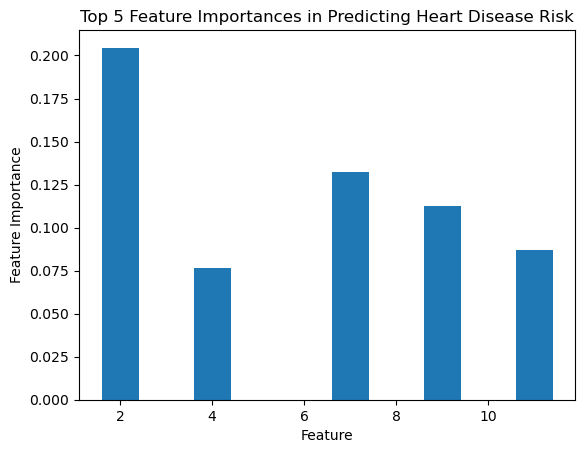

In [23]:
plt.bar(top_5_features, importance[top_5_features])
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.title("Top 5 Feature Importances in Predicting Heart Disease Risk")
plt.show()

In [24]:
df.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1


## Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try different values of the number of trees, maximum depth, minimum samples split, and minimum samples leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.

In [25]:
rfs

RandomForestClassifier(max_depth=10)

In [26]:
parameters = {'criterion' : ["gini", "entropy"],'max_depth':[5,10,15], 'n_estimators':[100,120]}

In [27]:
from sklearn.model_selection import GridSearchCV
grcv = GridSearchCV(rfs,param_grid=parameters,cv=5,scoring='accuracy')

In [28]:
grcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=10),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15], 'n_estimators': [100, 120]},
             scoring='accuracy')

In [30]:
y_pred1=grcv.predict(x_test)


## Q7. Report the best set of hyperparameters found by the search and the corresponding performance metrics. Compare the performance of the tuned model with the default model.

In [31]:
grcv.best_params_

{'criterion': 'gini', 'max_depth': 15, 'n_estimators': 100}

In [32]:
accuracy_score(y_pred1,y_test) #after hyperparameter tuning

0.7472527472527473

In [33]:
classification_report(y_pred1,y_test)

'              precision    recall  f1-score   support\n\n           0       0.71      0.72      0.72        40\n           1       0.78      0.76      0.77        51\n\n    accuracy                           0.75        91\n   macro avg       0.74      0.74      0.74        91\nweighted avg       0.75      0.75      0.75        91\n'

In [34]:
acc_score #before hyperparamater tuning

0.7582417582417582

In [35]:
report

'              precision    recall  f1-score   support\n\n           0       0.73      0.73      0.73        41\n           1       0.78      0.78      0.78        50\n\n    accuracy                           0.76        91\n   macro avg       0.76      0.76      0.76        91\nweighted avg       0.76      0.76      0.76        91\n'

as we can see after using hypermater, model accuracy is increased and precision and recall score is also increased.

## Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the decision boundaries on a scatter plot of two of the most important features. Discuss the insights and limitations of the model for predicting heart disease risk.

In [36]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<AxesSubplot: xlabel='cp', ylabel='thalach'>

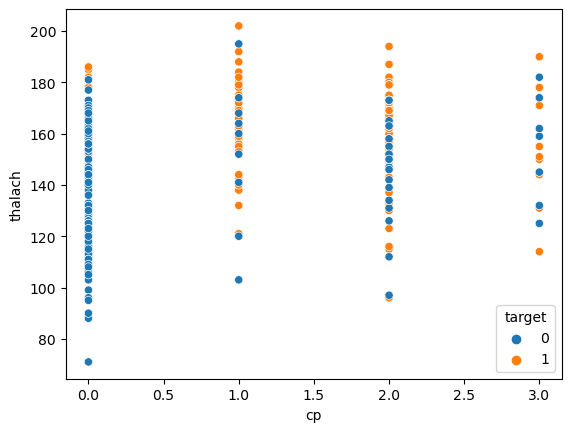

In [40]:
sns.scatterplot(df,x='cp',y='thalach',hue = 'target')

As the cp increases heart desease rate is also increases